In [2]:
from sklearn.svm import SVC #向量分类
from sklearn.datasets import fetch_lfw_people #数据集
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV #帮助选择最优算法，调节参数
from sklearn.decomposition import PCA #对数据降维处理
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn import svm #svm算法
import sklearn.datasets as datasets #数据集
%matplotlib inline

In [3]:
data = datasets.load_digits() #载入数据集合，数字

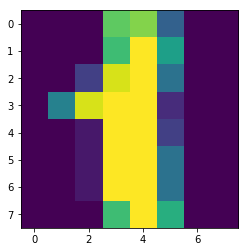

In [4]:
plt.imshow(data.images[1])

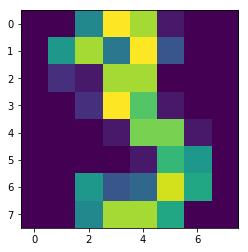

In [5]:
plt.imshow(data.images[3])

In [6]:
images = data.images #图片数据集合
targets = data.target #结果集合
targets

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
target_names = data.target_names #结果集合，不重复
target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
# 数据切割
x_train, x_test, y_train, y_test = train_test_split(images, targets, train_size=0.85, random_state=10) #85%用于训练

e:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


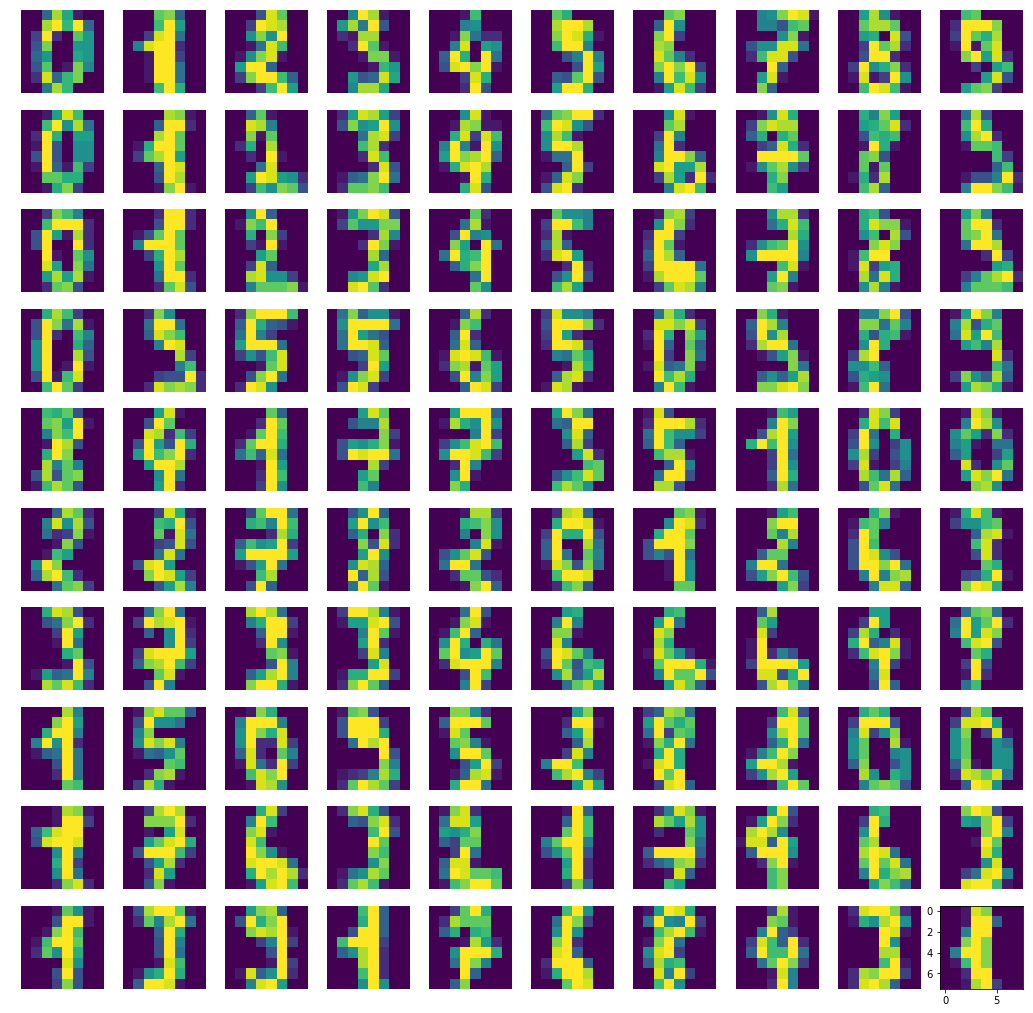

In [10]:
plt.figure(figsize=(18, 18)) #10*10
for i in range(100):
    plt.axis('off')
    plt.subplot(10, 10, i+1)
    plt.imshow(images[i])
plt.show()

In [12]:
x_train.shape

(1527, 8, 8)

In [17]:
x_train = x_train.reshape((1527, 64))

In [18]:
x_test.shape

(270, 64)

In [19]:
x_test = x_test.reshape((270, 64))

In [20]:
x_test.shape

(270, 64)

In [21]:
svc = svm.SVC()
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.4777777777777778

In [22]:
svc = svm.SVC(gamma=0.001)
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.9888888888888889

In [25]:
from sklearn.linear_model import LinearRegression
# 线性回归算法，最小二乘法，函数名，LinearRegression
def mx_line(train_x, train_y):
    mx = LinearRegression()
    mx.fit(train_x, train_y)
    return mx
mx = mx_line(x_train, y_train)
mx.score(x_test, y_test)

0.5791600970839539

In [28]:
from sklearn.linear_model import LogisticRegression
# 逻辑回归算法，函数名，LogisticRegression
def mx_log(train_x, train_y):
    mx = LogisticRegression()
    mx.fit(train_x, train_y)
    return mx
mx = mx_log(x_train, y_train)
mx.score(x_test, y_test)

0.9518518518518518

In [29]:
from sklearn.naive_bayes import MultinomialNB
# 多项式朴素贝叶斯算法，Multinomial Naive Bayes，函数名，multinomialnb
def mx_bayes(train_x, train_y):
    mx = MultinomialNB(alpha=0.01)
    mx.fit(train_x, train_y)
    return mx
mx = mx_bayes(x_train, y_train)
mx.score(x_test, y_test)

0.8888888888888888

In [30]:
from sklearn.neighbors import KNeighborsClassifier
# KNN近邻算法，函数名，KNeighborsClassifier
def mx_knn(train_x, train_y):
    mx = KNeighborsClassifier()
    mx.fit(train_x, train_y)
    return mx
mx = mx_knn(x_train, y_train)
mx.score(x_test, y_test)

0.9814814814814815

In [31]:
# 随机随机森林算法,random forest classifier，函数名,RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
def mx_forest(train_x, train_y):
    mx = RandomForestClassifier(n_estimators=8)
    mx.fit(train_x, train_y)
    return mx
mx = mx_forest(x_train, y_train)
mx.score(x_test, y_test)

0.9185185185185185

In [32]:
# 随机随机森林算法,random forest classifier，函数名,RandomForestClassifier
from sklearn import tree
def mx_dtree(train_x, train_y):
    mx = tree.DecisionTreeClassifier()
    mx.fit(train_x, train_y)
    return mx
mx = mx_dtree(x_train, y_train)
mx.score(x_test, y_test)

0.8740740740740741

In [33]:
# GBDT迭代决策树算法，Gradient Boosting Decision Tree,
# 又叫MART(Multiple Additive Regression Tree)，函数名，GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
def mx_GBDT(train_x, train_y):
    mx = GradientBoostingClassifier(n_estimators=200)
    mx.fit(train_x, train_y)
    return mx
mx = mx_GBDT(x_train, y_train)
mx.score(x_test, y_test)

0.9592592592592593

In [34]:
# SVM向量机算法，函数名 SVC
def mx_svm(train_x, train_y):
    mx = SVC(kernel='rbf', probability=True)
    mx.fit(train_x, train_y)
    return mx
mx = mx_svm(x_train, y_train)
mx.score(x_test, y_test)

0.4777777777777778

In [36]:
# SVM-cross向量机交叉算法，函数名 SVC，自动调优
def mx_svm_cross(train_x, train_y):
    mx = SVC(kernel='rbf', probability=True)
    param_grid = {'C':[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma':[0.001, 0.0001]}
    grid_search = GridSearchCV(mx, param_grid, n_jobs=1, verbose=1)
    grid_search.fit(train_x, train_y)
    best_parameters = grid_search.best_estimator_.get_params()
#     for para, val in best_parameters.items():
#         print(para, val)
    mx = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)
    mx.fit(train_x, train_y)
    return mx
mx = mx_svm_cross(x_train, y_train)
mx.score(x_test, y_test)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   47.1s finished


0.9888888888888889

In [38]:
# MLP神经网络算法
# from NeuralNetwork import NeuralNetwork
from sklearn.neural_network import MLPClassifier
def mx_MLP(train_x, train_y):
    # mx = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
    mx = MLPClassifier()
    mx.fit(train_x, train_y)
    return mx
mx = mx_MLP(x_train, y_train)
mx.score(x_test, y_test)

0.9666666666666667

In [39]:
# 神经网络回归算法
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
def mx_MLP_reg(train_x, train_y):
    # mx = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
    mx = MLPRegressor()
    mx.fit(train_x, train_y)
    return mx
mx = mx_MLP_reg(x_train, y_train)
mx.score(x_test, y_test)

0.854703991225945

In [40]:
# SVM-cross向量机交叉算法，函数名 SVC，自动调优
def mx_svm_cross(train_x, train_y):
    mx = SVC(kernel='rbf', probability=True)
    param_grid = {'C':[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma':[0.001, 0.0001]}
    grid_search = GridSearchCV(mx, param_grid, n_jobs=1, verbose=1)
    grid_search.fit(train_x, train_y)
    best_parameters = grid_search.best_estimator_.get_params()
#     for para, val in best_parameters.items():
#         print(para, val)
    mx = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)
    mx.fit(train_x, train_y)
    return mx
mx = mx_svm_cross(x_train, y_train)
mx.score(x_test, y_test)
y_ = mx.predict(x_test) #预测结果

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   42.7s finished


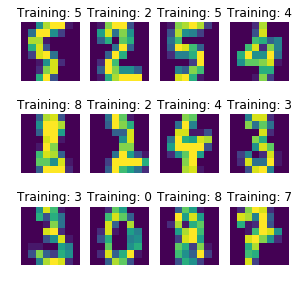

In [41]:
# 真实数据
plt.figure(figsize=(1.6*3, 1.2*4))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.axis('off')
    plt.imshow(x_test[i].reshape(8, 8))
    plt.title("Training: %d" %target_names[y_test[i]])
plt.show()

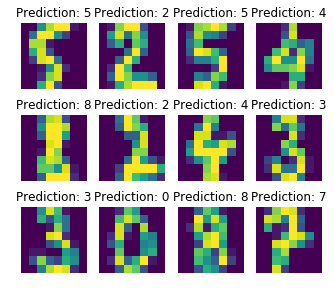

In [42]:
# 预测数据
plt.figure(figsize=(1.8*3, 1.2*4))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.axis('off')
    plt.imshow(x_test[i].reshape(8, 8))
    plt.title("Prediction: %d" %target_names[y_[i]])
plt.show()